## 군집화 : 군집 평가 (Cluster Evaluation) : 실루엣 분석

### 군집화 평가
- 비지도 학습의 특성상 
    - 어떠한 지표도 정확하게 성능을 평가하기 어려움  
    - 대표적 군집화 성능 평가 방법 : 실루엣 분석 

실루엣 분석 (Silhouette Analysis)
- 각 군집 간의 거리가 얼마나 효율적으로 분리되어 있는지 분석
- 효율적 분리 의미
    - 다른 군집과의 거리는 떨어져 있고
    - 동일 군집끼리의 데이터는 서로 가깝게 잘 뭉쳐있다는 의미
- 군집화가 잘 될수록 개별 군집은 비슷한 정도의 여유 공간을 가지고 떨어져 있음
- 실루엣 계수(Silhouette coefficient) 기반
    - 개별 데이터가 가지는 군집화 지표로
    - 해당 데이터가 같은 군집 내의 데이터와 얼마나 가깝게 군집화되어 있고
    - 다른 군집에 있는 데이터와는 얼마나 멀리 분리되어 있는지를 나타내는 지표

실루엣 분석
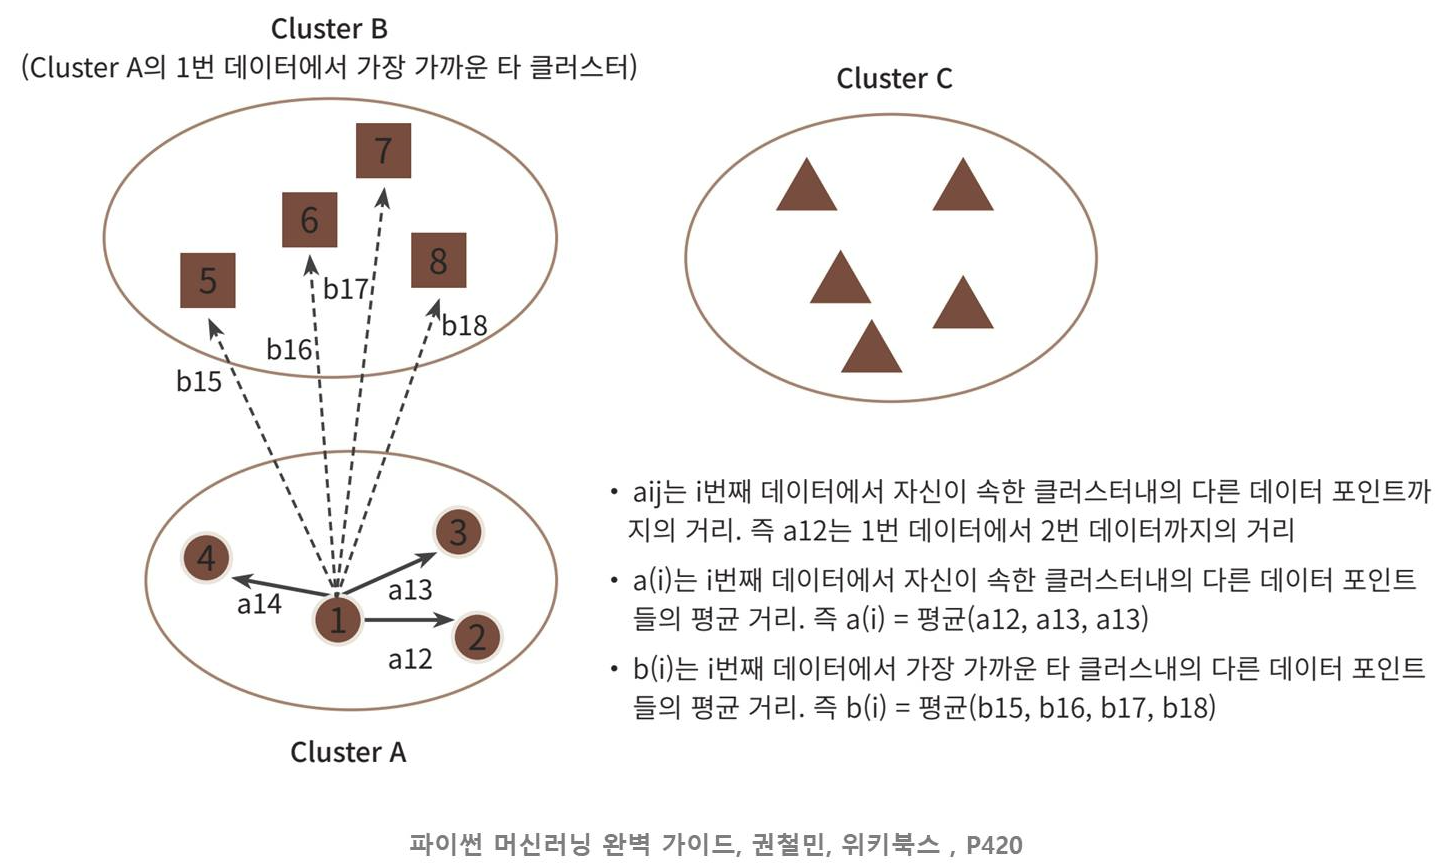

### 특정 데이터 포인트의 실루엣 계수
- 해당 데이터 포인트와 같은 군집 내에 있는 
    - 다른 데이터 포인트와의 거리를 평균한 값 : a(i)   
- 해당 포인트가 속하지 않은 군집 중
    - 가장 가까운 군집과의 평균 거리 : b(i)


#### 두 군집 간의 거리가 얼마나 떨어져 있는가의 값
- b(i) - a(i)
    - -1에서 1 사이의 값  
    - 1로 가까워질수록 근처의 군집과 더 멀리 떨어져 있다는 것이고  
    - 0에 가까울수록 근처의 군집과 가까워진다는 것  
    - 음수값은 아예 다른 군집에 데이터 포인트가 할당되었음을 의미  

### 실루엣 분석을 위한 사이킷런 메서드

- sklearn.metrics 모듈의 silhouette_samples()  
    - 인자 : 피처 데이터, 레이블 값  
    - 반환값 : 각 데이터 포인트의 실루엣 계수  
    
- sklearn.metrics 모듈의 silhouette_score()  
    - 인자 : 피처 데이터, 레이블 값  
    - 반환값 : 전체 데이터의 실루엣 계수 평균 값  
        - 이 값이 높을수록 군집화가 어느 정도 잘 됐다고 판단    
        - 하지만 무조건 높다고 군집화가 잘 됐다고는 판단할 수는 없음  

### 좋은 군집화가 되기 위한 기준
- 전체 실루엣 계수 값의 평균값
    - silhouette_score() 값이 0~1 사이의 값을 갖고, 1에 가까울수록 좋음  
- 전체 실루엣 계수의 평균값과 더불어 개별 군집의 평균값의 편차가 크지 않아야 함  
- 즉, 개별 군집의 실루엣 계수 평균값이 전체 실루엣 계수의 평균값에서 크게 벗어나지 않는 것이 중요  
- 만일 전체 실루엣 계수의 평균값은 높지만  
- 특정 군집의 실루엣 계수 평균값만 유난히 높교  
- 다른 군집들의 실루엣 계수 평균값은 낮으면 좋은 군집화 조건이 아님  
- 아래 그림의 경우 
  - 군집 개수가 2개(cluster:2)인 경우가 가장 좋은 군집화 결과로 보임

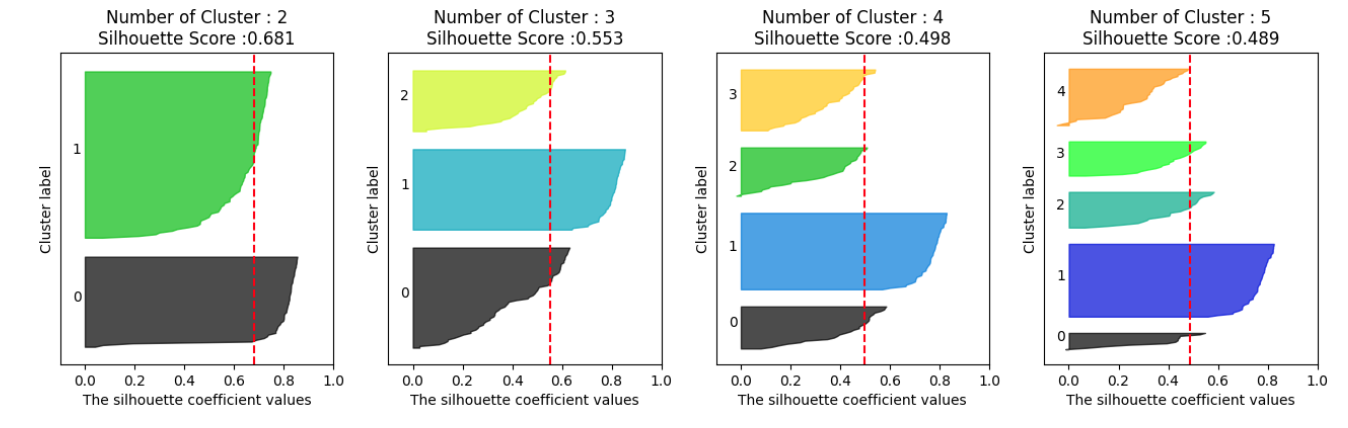

### 붓꽃 데이터 셋을 이용한 클러스 평가

앞의 붓꽃 데이터 셋의 군집화 결과를 실루엣 분석으로 평가  
silhouette_samples() / silhouette_score() 사용

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris

iris = load_iris()

feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
iris_df = pd.DataFrame(data=iris.data, columns=feature_names)
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [26]:
# KMeans로 군집화 수행
# n_clusters=3인 경우 

from sklearn.cluster import KMeans

# KMeans 객체를 이용해서 X 데이터를 K-Means 클러스터링 수행
kmeans = KMeans(n_clusters=3, n_init=10, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(iris_df)

KMeans(n_clusters=3, n_init=10, random_state=0)

In [27]:
iris_df['cluster'] = kmeans.labels_
iris_df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,0,0.827850
1,4.9,3.0,1.4,0.2,0,0.780214
2,4.7,3.2,1.3,0.2,0,0.798484


In [28]:
# 실루엣 계수값 구하기 

from sklearn.metrics import silhouette_samples, silhouette_score

# iris_df의 모든 개별 데이터의 실루엣 계수값 구하기
score_samples = silhouette_samples(iris.data, iris_df['cluster'])
score_samples.shape

,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,0,0.827850
1,4.9,3.0,1.4,0.2,0,0.780214
2,4.7,3.2,1.3,0.2,0,0.798484


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
147,6.5,3.0,5.2,2.0,1,0.520176
148,6.2,3.4,5.4,2.3,1,0.464168
149,5.9,3.0,5.1,1.8,1,0.278078


In [10]:
# score_samples

In [19]:
# iris_df에 개별 실루엣 계수 컬럼 추가
iris_df['silhouette_coeff'] = score_samples
iris_df.head(3)
iris_df.tail(3)

,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,0,0.827850
1,4.9,3.0,1.4,0.2,0,0.780214
2,4.7,3.2,1.3,0.2,0,0.798484


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
147,6.5,3.0,5.2,2.0,1,0.520176
148,6.2,3.4,5.4,2.3,1,0.464168
149,5.9,3.0,5.1,1.8,1,0.278078


In [20]:
# 모든 데이터의 평균 실루엣 계수값 구하기
average_score = silhouette_score(iris.data, iris_df['cluster'])
average_score
 
# 결과
# 1번 군집의 처음 5개 데이터의 실루엣 계수값은 0.8 이상으로 높은 수치를 나타내는데
# 평균 실루엣 계수값이 0.5528로 나옴
# --> 다른 군집의 실루엣 계수 평균이 낮음을 알 수 있음

0.5135953221192214

In [22]:
# 군집별 실루엣 계수값 확인
iris_df.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.763176
1    0.312384
2    0.585317
Name: silhouette_coeff, dtype: float64

In [24]:
iris_df[iris_df['cluster']==2].head()

,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
53,5.5,2.3,4.0,1.3,2,0.659830
55,5.7,2.8,4.5,1.3,2,0.468298
57,4.9,2.4,3.3,1.0,2,0.521466
59,5.2,2.7,3.9,1.4,2,0.662098
60,5.0,2.0,3.5,1.0,2,0.579996


### 실루엣 분석 

In [14]:
# 사이킷런 튜토리얼에 들어 있는 예제

사이킷런의 대표적인 군집화용 데이터 생성기 make_blobs() 사용
- make_blobs()  
    - 여러 개의 클래스에 해당하는 데이터 세트 생성  
    - 개별 군집의 중심점과 표준 편차 제어 기능 추가 되어있음   

make_blobs()의 주요 파라미터

* n_samples: 생성할 총 데이터의 개수. 디폴트는 100개. 
    
* n_features: 데이터의 피처 개수 
    - 시각화를 목표로 할 경우 2개로 설정해 보통 첫 번째 피처는 x 좌표, 
    - 두 번째 피처는 y 좌표상에 표현  

* centers: int 값, 예를 들어 3으로 설정하면 군집의 개수
    - ndarray 형태로 표현할 경우 
        - 개별 군집 중심점의 좌표를 의미  

* cluster_std: 생성될 군집 데이터의 표준 편차
    - 만일 float 값 0.8과 같은 형태로 지정하면 
        - 군집 내에서 데이터가 표준편차 0.8을 가진 값으로 만들어짐   
    - [0.8, 1.2, 0.6]과 같은 형태로 표현되면 3개의 군집에서 
        - 첫 번째 군집 내 데이터의 표준편차는 0.8, 
        - 두 번째 군집 내 데이터의 표준 편차는 1.2, 
        - 세 번째 군집 내 데이터의 표준편차는 0.6으로 만듦
        - 군집별로 서로 다른 표준 편차를 가진 데이터 세트를 만들 때 사용 

In [29]:
from sklearn.datasets import make_blobs

Automatically created module for IPython interactive environment


(-0.1, 1.0)

(0.0, 530.0)

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262


Text(-0.05, 197.5, '0')

Text(-0.05, 457.5, '1')

Text(0.5, 1.0, 'The silhouette plot for the various clusters.')

Text(0.5, 0, 'The silhouette coefficient values')

Text(0, 0.5, 'Cluster label')

[]

Text(0.5, 1.0, 'The visualization of the clustered data.')

Text(0.5, 0, 'Feature space for the 1st feature')

Text(0, 0.5, 'Feature space for the 2nd feature')

Text(0.5, 0.98, 'Silhouette analysis for KMeans clustering on sample data with n_clusters = 2')

(-0.1, 1.0)

(0.0, 540.0)

For n_clusters = 3 The average silhouette_score is : 0.5882004012129721


Text(-0.05, 135.5, '0')

Text(-0.05, 333.5, '1')

Text(-0.05, 468.0, '2')

Text(0.5, 1.0, 'The silhouette plot for the various clusters.')

Text(0.5, 0, 'The silhouette coefficient values')

Text(0, 0.5, 'Cluster label')

[]

Text(0.5, 1.0, 'The visualization of the clustered data.')

Text(0.5, 0, 'Feature space for the 1st feature')

Text(0, 0.5, 'Feature space for the 2nd feature')

Text(0.5, 0.98, 'Silhouette analysis for KMeans clustering on sample data with n_clusters = 3')

(-0.1, 1.0)

(0.0, 550.0)

For n_clusters = 4 The average silhouette_score is : 0.6505186632729437


Text(-0.05, 71.5, '0')

Text(-0.05, 205.5, '1')

Text(-0.05, 340.0, '2')

Text(-0.05, 476.0, '3')

Text(0.5, 1.0, 'The silhouette plot for the various clusters.')

Text(0.5, 0, 'The silhouette coefficient values')

Text(0, 0.5, 'Cluster label')

[]

Text(0.5, 1.0, 'The visualization of the clustered data.')

Text(0.5, 0, 'Feature space for the 1st feature')

Text(0, 0.5, 'Feature space for the 2nd feature')

Text(0.5, 0.98, 'Silhouette analysis for KMeans clustering on sample data with n_clusters = 4')

(-0.1, 1.0)

(0.0, 560.0)

For n_clusters = 5 The average silhouette_score is : 0.56376469026194


Text(-0.05, 72.5, '0')

Text(-0.05, 207.5, '1')

Text(-0.05, 310.5, '2')

Text(-0.05, 411.5, '3')

Text(-0.05, 516.0, '4')

Text(0.5, 1.0, 'The silhouette plot for the various clusters.')

Text(0.5, 0, 'The silhouette coefficient values')

Text(0, 0.5, 'Cluster label')

[]

Text(0.5, 1.0, 'The visualization of the clustered data.')

Text(0.5, 0, 'Feature space for the 1st feature')

Text(0, 0.5, 'Feature space for the 2nd feature')

Text(0.5, 0.98, 'Silhouette analysis for KMeans clustering on sample data with n_clusters = 5')

(-0.1, 1.0)

(0.0, 570.0)

For n_clusters = 6 The average silhouette_score is : 0.4504666294372765


Text(-0.05, 42.5, '0')

Text(-0.05, 147.5, '1')

Text(-0.05, 248.0, '2')

Text(-0.05, 346.5, '3')

Text(-0.05, 447.0, '4')

Text(-0.05, 523.5, '5')

Text(0.5, 1.0, 'The silhouette plot for the various clusters.')

Text(0.5, 0, 'The silhouette coefficient values')

Text(0, 0.5, 'Cluster label')

[]

Text(0.5, 1.0, 'The visualization of the clustered data.')

Text(0.5, 0, 'Feature space for the 1st feature')

Text(0, 0.5, 'Feature space for the 2nd feature')

Text(0.5, 0.98, 'Silhouette analysis for KMeans clustering on sample data with n_clusters = 6')

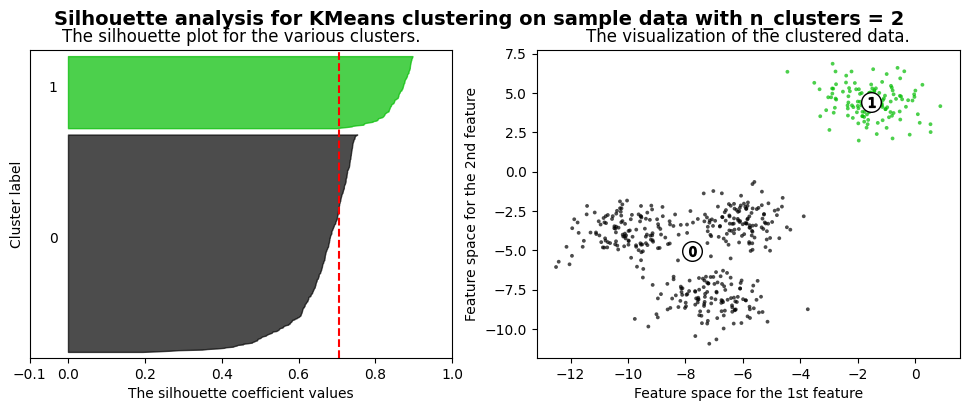

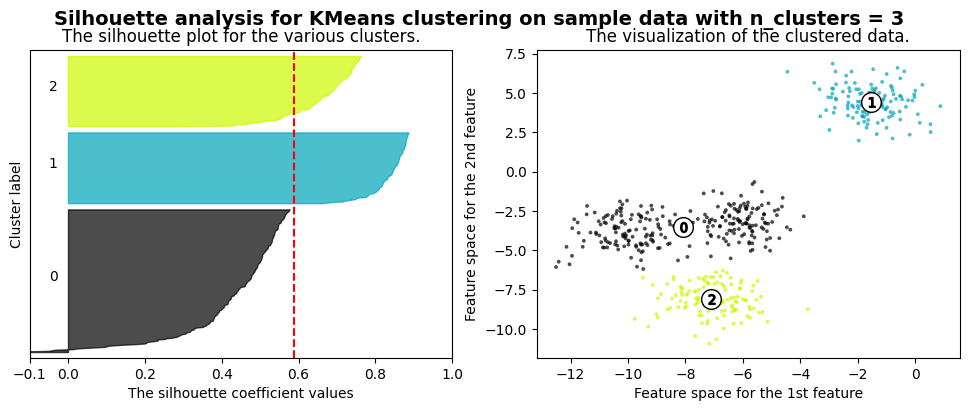

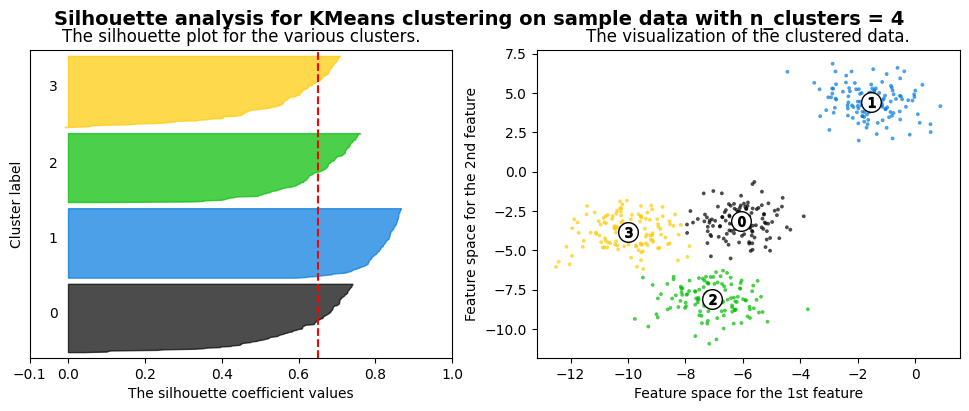

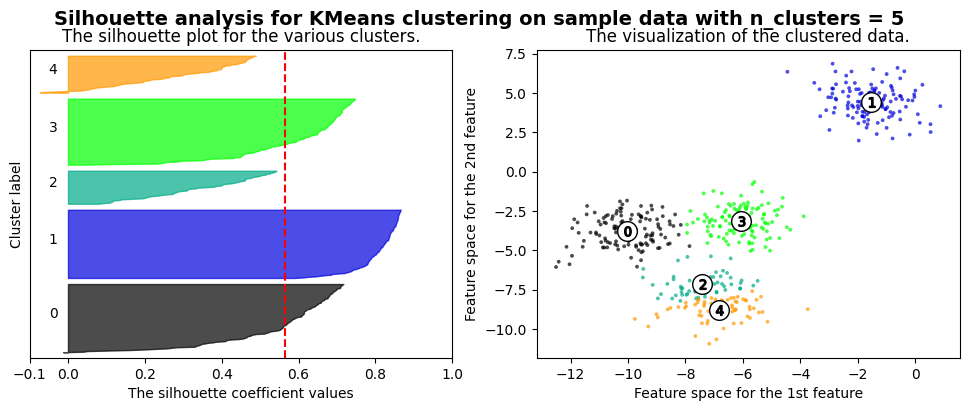

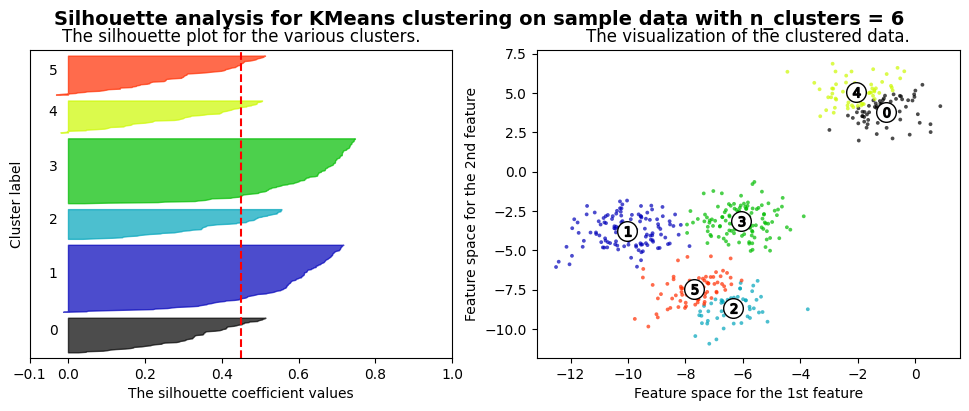

In [30]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
#     fig.set_size_inches(18, 7)
    fig.set_size_inches(12, 4)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init=10, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

# range_n_clusters = [2, 3, 4, 5, 6] 경우 

#### 그래프로 표현
- 개별 군집에 속하는 데이터의 실루엣 계수를 2차원으로 나타낸 것
- X축은 실루엣 계수 값이고
- Y축은 개별 군집과 이에 속하는 데이터
- 개별 군집 : 숫자값으로 0, 1로 Y축에 표시 
- 이에 해당하는 데이터는 일일이 숫자 값으로 표시되지 않았지만
- Y축 높이로 추축 가능
- 점선 : 전체 평균 실루엣 계수 값

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.5804620679044765
For n_clusters = 6 The average silhouette_score is : 0.4966479110816958 

#### 군집의 개수가 2개인 경우
- For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
- 평균 silhouette_score는 약 0.704로 매우 높게 나타남  
- 1번 군집의 모든 데이터는 평균 실루엣 계수값 이상이지만
- 0번 군집의 경우는 평균보다 작은 데이터 값이 매우 많음 

1번 군집의 경우
- 0번 군집과 멀리 떨어져 있고 
- 내부 데이터끼리 잘 뭉쳐 있음

0번 군집의 경우
- 내부 데이터끼리 많이 떨어져 있음   

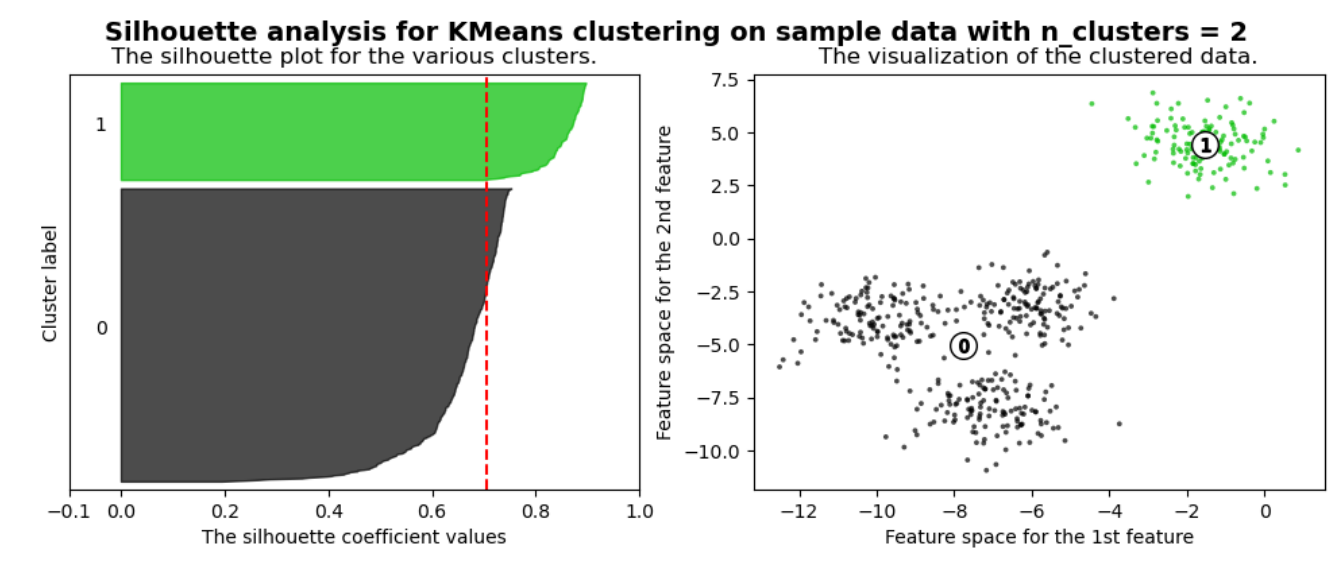

#### 군집의 개수가 3개인 경우
- For n_clusters = 3 The average silhouette_score is : 0.5882004012129721  
- 전체 평균 실루엣 값은 약 0.588 정도
- 1번, 2번 군집의 경우 평균보다 높은 실루엣 계수값을 가지고 있지만
- 0번의 경우 모두 평균보다 낮음
    - 0번의 경우 내부 데이터 간의 거리도 멀지만
    - 2번 군집과도 가깝게 위치하고 있음

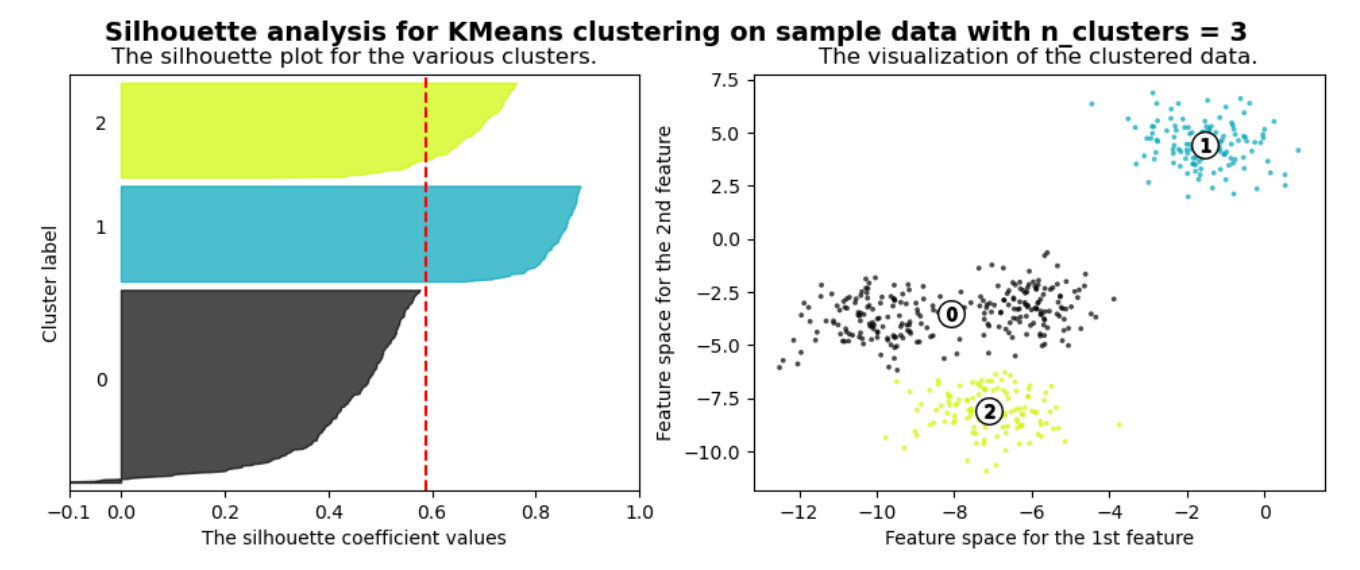

#### 군집의 개수가 4개인 경우
- For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
- 평균 실루엣 계수 값은 약 0.65
- 개별 군집의 평균 실루엣 계수 값이 비교적 균일하게 위치
- 1번 군집의 경우 모든 데이터가 평균보다 높고
- 0번, 2번의 경우 반 이상이 평균보다 높고  
- 3번 군집의 경우 약1/3 정도가 평균보다 높음
- 군집이 2개인 경우의 평균 실루엣 값(0.704) 보다 작지만 (0.65)
- 4개의 경우가 가장 이상적인 군집화 개수로 판단될 수 있음  
- 0,2,3번 군집의 거리가 가깝기는 하지만   
- 모든 군집이 내부 데이터가 잘 뭉쳐있음   

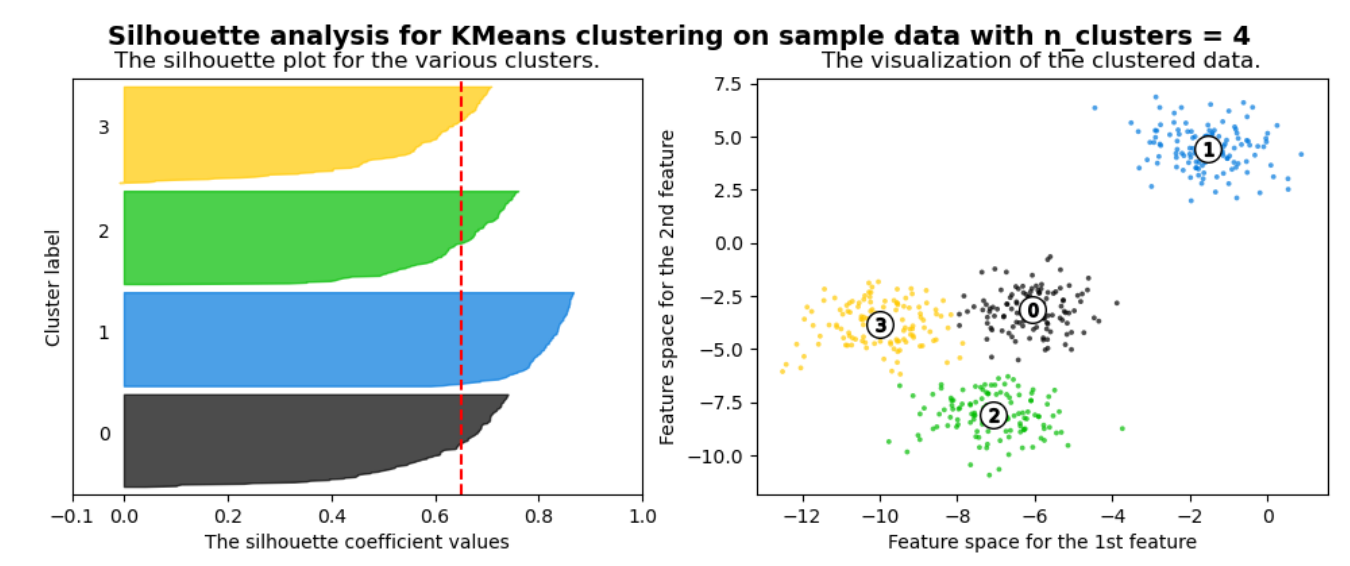

In [ ]:
################################ 사이킷런 튜토리얼 예제 끝 ####################################

### 군집 개수에 따른 K-평균 군집화 실루엣 분석

### 붓꽃 데이터를 이용해 K-평균 수행 시 최적의 군집 개수 확인

In [31]:
def visualize_silhouette(cluster_lists, X_features):  
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, n_init=10,  max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

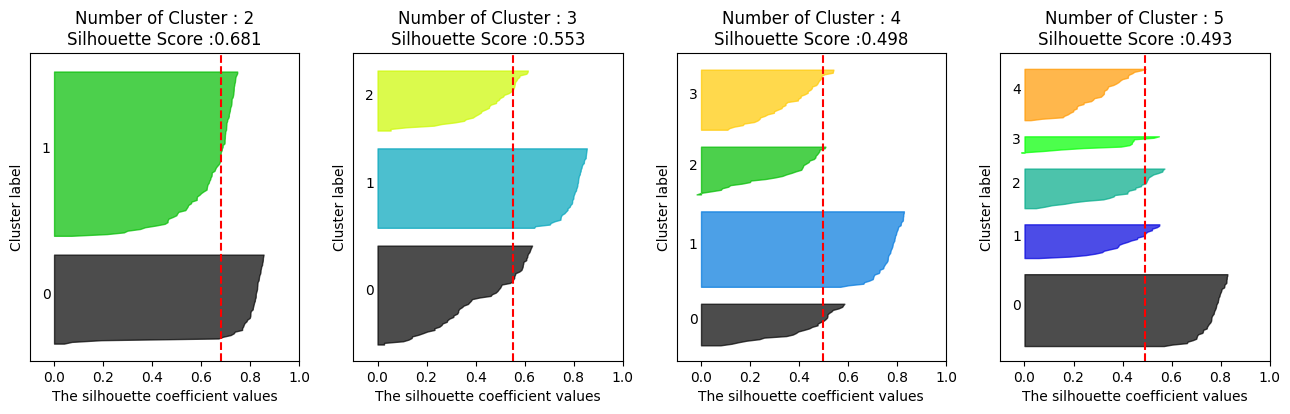

In [33]:
# 붓꽃 데이터 세트로 군집화한 결과 평가
from sklearn.datasets import load_iris

iris = load_iris()
visualize_silhouette([2,3,4,5], iris.data)

# 실루엣 계쑤를 활용한 군집화 평가
# 결과

# 군집이 2개인 경우 : 평균 실루엣 계수값이 0.681로 제일 높고
# - 0번 군집 : 대부분 평균보다 높음
# - 1번 군집 : 반 이상이 평균보다 높음

# 군집이 3개인 경우 : 평균 실루엣 계수값이 0.553로 군집2개 경우보다 낮고
# - 0, 2번 군집 : 대부분 평균 이하
# - 1번 군집 : 모두 평균 이상이지만, 다른 0,2 군집과 실루엣 계수 편차가 큼

# 4~5개인 경우 : 마찬가지로 실루엣 계수 낮음
# - 군집 간 편차 심하고
# 1번 군집을 제외한 나머지 군집들이 대부분 평균 이하로 나왔음

# 군집 2

### 군집화 / 평가 정리
- 실루엣 계수를 통한 K-평균 군집 평가 방법은 직관적으로 이해하기 쉽지만    
- 각 데이터별로 다른 데이터와의 거리를 반복적으로 계산해야 하므로    
- 데이터 양이 늘어나면 수행시간이 크게 걸림  
- 특히 몇 만 또는 그 이상의 데이터에 대해  
    - 사이킷런의 실루엣 계수 평가 API를 개인용 PC에서 수행할 경우  
    - 메모리 부족 등의 에러가 발생하기 쉬움    
    - 이 경우 군집별로 임의의 데이터를 샘플링해서    
    - 실루엣 계수를 평가하는 방안을 고려해봐야 함    